<a href="https://colab.research.google.com/github/dyahyn/signal-processing/blob/main/High_Pass_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
from IPython.display import Audio
from scipy.io import wavfile
from io import BytesIO

(0.0, 0.1)

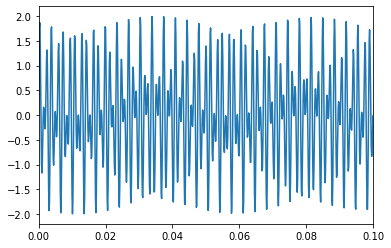

In [46]:
#signal with frquencies 586 Hz and 863 Hz
fs  = 8000
t = np.arange(0, 5, step = 1./fs)
z = np.sin(2 * np.pi * 568 * t) + np.sin(2 * np.pi * 863 *t)


plt.plot(t,z)
plt.xlim(0, .1)


In [47]:
Audio(z, rate = fs)

In [48]:
 Z = np.fft.fft(z)
 Z

array([ 2.34416275e-11+0.00000000e+00j,  4.23670799e-11+1.15469440e-11j,
       -8.32500808e-12-2.50211423e-12j, ...,
        1.84376363e-11-1.98033452e-11j, -8.32500808e-12+2.50211423e-12j,
        4.23718658e-11-1.15605260e-11j])

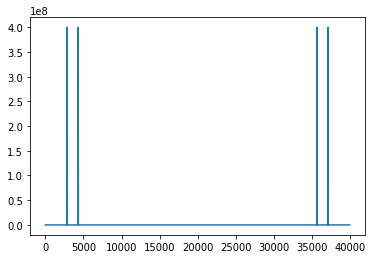

In [49]:
X_pow = np.abs(Z) ** 2
plt.plot(X_pow)

(40000, 20000)

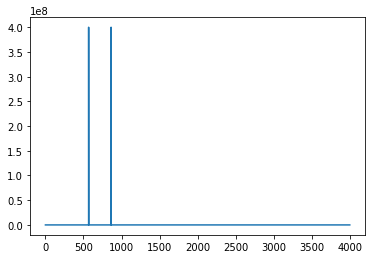

In [50]:
N = len(X_pow)
f_pos = np.arange(0, fs /2 , step= fs/N)
plt.plot(f_pos, X_pow[:(N//2)])

N, len(f_pos)

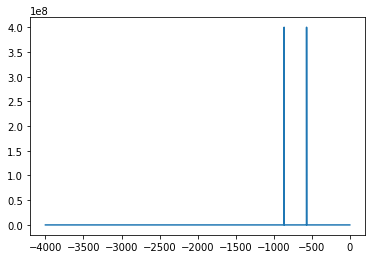

In [51]:
f_neg = np.arange(-fs / 2, 0, step=fs/N)
plt.plot(f_neg, X_pow[(N//2):])

(-0.1, 1.1)

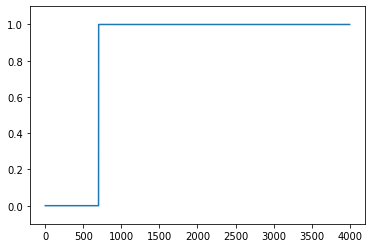

In [52]:
#High Pass Filter
f_pos = np.arange(0, fs/2, step = fs/N)
H_pos = 1. * (f_pos >= 700)
plt.plot(f_pos,H_pos)
plt.ylim(-.1, 1.1)

(-0.1, 1.1)

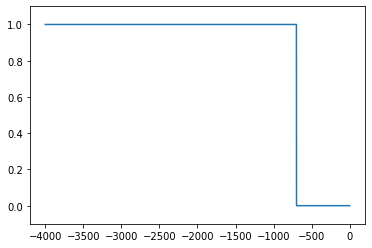

In [53]:
f_neg = np.arange( -fs/2, 0,  step = fs/N)
H_neg = 1. * (f_neg <= -700)
plt.plot(f_neg,H_neg)
plt.ylim(-.1, 1.1)

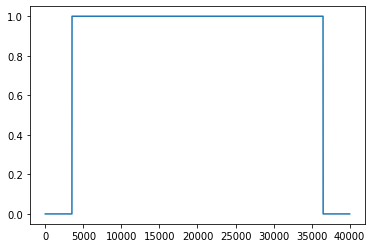

In [54]:
H = np.concatenate([H_pos, H_neg])
plt.plot(H)

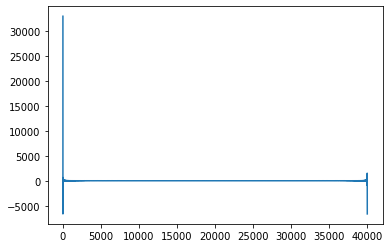

In [55]:
H = np.real(np.fft.fft(H))
plt.plot(H)

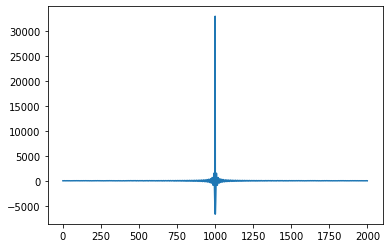

In [56]:
H_trunc = np.concatenate([H[-1000:], H[:1000]])
plt.plot(H_trunc)

In [57]:

y = np.convolve(z,H_trunc)

y = y[:-1]

(0.3, 0.4)

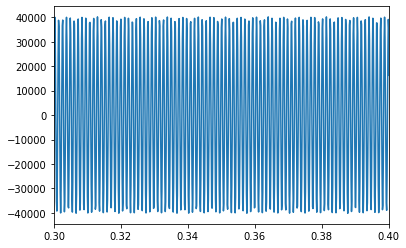

In [ ]:
N = len(y)
t = np.arange(0, N / fs, step = 1 /fs)
plt.plot(t, y)
plt.xlim(.3, .4)

In [58]:
f_pos = np.arange(0, fs/2, step = fs/N)
Y = np.fft.fft(y)
Y_pow = np.abs(Y) **2

(0.0, 730.0)

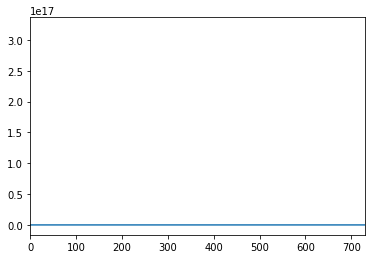

In [ ]:
plt.plot(f_pos, Y_pow[:(N//2)])
plt.xlim(0, 730)

In [59]:
Audio(y, rate = fs)